In [41]:
import spike.spike_analysis.spike_collection as sc
import spike.spike_analysis.spike_recording as sr
import spike.spike_analysis.firing_rate_calculations as fr
import spike.spike_analysis.normalization as norm
import spike.spike_analysis.single_cell as single_cell
import spike.spike_analysis.spike_collection as collection
import spike.spike_analysis.zscoring as zscoring
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import behavior.boris_extraction as boris
import matplotlib.pyplot as plt
import pickle
import re

In [42]:
pd.set_option('display.max_colwidth', 0)  # 0 means unlimited in newer pandas versions

# Show all rows
pd.set_option("display.max_rows", None)

# Show all columns
pd.set_option("display.max_columns", None)

# Don’t truncate column contents
pd.set_option("display.max_colwidth", None)

# Expand the display to the full width of the screen
pd.set_option("display.width", 0)


In [43]:
spike_collection_json_path = r'C:\Users\thoma\Code\ResearchCode\diff_fam_social_memory_ephys\spike_collection.json\spike_collection.json'

In [44]:
import importlib
importlib.reload(sc)
importlib.reload(zscoring)

<module 'spike.spike_analysis.zscoring' from 'c:\\Users\\thoma\\Code\\ResearchCode\\diff_fam_social_memory_ephys\\spike\\spike_analysis\\zscoring.py'>

In [45]:
sp = sc.SpikeCollection.load_collection(spike_collection_json_path)

In [46]:
rec_events = sp.recordings[0].event_dict

# get unique event names from rec_events dictionary
event_names = list(rec_events.keys())
print("Unique event names:", event_names)

Unique event names: ['alone_rewarded', 'alone_rewarded_baseline', 'high_comp', 'high_comp_lose', 'high_comp_lose_baseline', 'high_comp_win', 'high_comp_win_baseline', 'lose', 'low_comp', 'low_comp_lose', 'low_comp_lose_baseline', 'low_comp_win', 'low_comp_win_baseline', 'overall_pretone', 'win']


In [47]:
exclude_events_baseline_alone_rewarded = [ 'alone_rewarded_baseline', 'high_comp', 'high_comp_lose_baseline', 'high_comp_win_baseline', 
                           'low_comp', 'low_comp_lose_baseline', 'low_comp_win_baseline', 'lose', 'win', 'overall_pretone']

In [48]:
exclude_events_baseline = [ 'alone_rewarded_baseline', 'high_comp', 'high_comp_lose_baseline', 'high_comp_win_baseline', 
                           'low_comp', 'low_comp_lose_baseline', 'low_comp_win_baseline', 'lose', 'win', 'overall_pretone', 'alone_rewarded']

In [49]:
win_lose = ['win', 'lose']

In [50]:
# for each rec, what makes up the percentages of win or lose events
event_name_counts = {}
for rec in sp.recordings:
    event_dict = rec.event_dict
    total_events = sum(len(v) for k, v in event_dict.items() if k in win_lose)
    event_name_counts[rec.name] = {k: len(v) for k, v in event_dict.items() if k in win_lose}
    event_name_counts[rec.name]['total'] = total_events

# Calculate percentages
event_name_percentages = {}
for rec_name, counts in event_name_counts.items():
    event_name_percentages[rec_name] = {k: (v / counts['total'] * 100) if counts['total'] > 0 else 0
                                         for k, v in counts.items() if k != 'total'}
# Display results
for rec_name, percentages in event_name_percentages.items():
    print(f"Recording: {rec_name}")
    for event_name, percentage in percentages.items():
        print(f"  Event: {event_name}, Percentage: {percentage:.2f}%")
    print()


Recording: 20230612_101430_standard_comp_to_training_D1_subj_1-3_t3b3L_box2_merged.rec
  Event: lose, Percentage: 35.00%
  Event: win, Percentage: 65.00%

Recording: 20230612_101430_standard_comp_to_training_D1_subj_1-4_t4b2L_box1_merged.rec
  Event: lose, Percentage: 65.00%
  Event: win, Percentage: 35.00%

Recording: 20230612_112630_standard_comp_to_training_D1_subj_1-1_t1b3L_box2_merged.rec
  Event: lose, Percentage: 65.00%
  Event: win, Percentage: 35.00%

Recording: 20230612_112630_standard_comp_to_training_D1_subj_1-2_t2b2L_box1_merged.rec
  Event: lose, Percentage: 35.00%
  Event: win, Percentage: 65.00%

Recording: 20230613_105657_standard_comp_to_training_D2_subj_1-1_t1b2L_box1_merged.rec
  Event: lose, Percentage: 5.00%
  Event: win, Percentage: 95.00%

Recording: 20230613_105657_standard_comp_to_training_D2_subj_1-4_t4b3L_box2_merged.rec
  Event: lose, Percentage: 95.00%
  Event: win, Percentage: 5.00%

Recording: 20230614_114041_standard_comp_to_training_D3_subj_1-1_t1b3L_b

In [51]:
# for each rec, what makes up the percentages of events? not including those in exclude_events_baseline
event_name_counts = {}
for rec in sp.recordings:
    event_dict = rec.event_dict
    total_events = sum(len(v) for k, v in event_dict.items() if k not in exclude_events_baseline)
    event_name_counts[rec.name] = {k: len(v) for k, v in event_dict.items() if k not in exclude_events_baseline}
    event_name_counts[rec.name]['total'] = total_events

# Calculate percentages
event_name_percentages = {}
for rec_name, counts in event_name_counts.items():
    event_name_percentages[rec_name] = {k: (v / counts['total'] * 100) if counts['total'] > 0 else 0
                                         for k, v in counts.items() if k != 'total'}
# Display results
for rec_name, percentages in event_name_percentages.items():
    print(f"Recording: {rec_name}")
    for event_name, percentage in percentages.items():
        print(f"  Event: {event_name}, Percentage: {percentage:.2f}%")
    print()

Recording: 20230612_101430_standard_comp_to_training_D1_subj_1-3_t3b3L_box2_merged.rec
  Event: high_comp_lose, Percentage: 5.00%
  Event: high_comp_win, Percentage: 40.00%
  Event: low_comp_lose, Percentage: 30.00%
  Event: low_comp_win, Percentage: 25.00%

Recording: 20230612_101430_standard_comp_to_training_D1_subj_1-4_t4b2L_box1_merged.rec
  Event: high_comp_lose, Percentage: 40.00%
  Event: high_comp_win, Percentage: 5.00%
  Event: low_comp_lose, Percentage: 25.00%
  Event: low_comp_win, Percentage: 30.00%

Recording: 20230612_112630_standard_comp_to_training_D1_subj_1-1_t1b3L_box2_merged.rec
  Event: high_comp_lose, Percentage: 50.00%
  Event: high_comp_win, Percentage: 20.00%
  Event: low_comp_lose, Percentage: 15.00%
  Event: low_comp_win, Percentage: 15.00%

Recording: 20230612_112630_standard_comp_to_training_D1_subj_1-2_t2b2L_box1_merged.rec
  Event: high_comp_lose, Percentage: 20.00%
  Event: high_comp_win, Percentage: 50.00%
  Event: low_comp_lose, Percentage: 15.00%
  Eve

In [52]:
i = 0
for rec in sp.recordings:
    i+=1
    print(f"{i}: {rec.name}")

1: 20230612_101430_standard_comp_to_training_D1_subj_1-3_t3b3L_box2_merged.rec
2: 20230612_101430_standard_comp_to_training_D1_subj_1-4_t4b2L_box1_merged.rec
3: 20230612_112630_standard_comp_to_training_D1_subj_1-1_t1b3L_box2_merged.rec
4: 20230612_112630_standard_comp_to_training_D1_subj_1-2_t2b2L_box1_merged.rec
5: 20230613_105657_standard_comp_to_training_D2_subj_1-1_t1b2L_box1_merged.rec
6: 20230613_105657_standard_comp_to_training_D2_subj_1-4_t4b3L_box2_merged.rec
7: 20230614_114041_standard_comp_to_training_D3_subj_1-1_t1b3L_box1_merged.rec
8: 20230614_114041_standard_comp_to_training_D3_subj_1-2_t2b2L_box2_merged.rec
9: 20230616_111904_standard_comp_to_training_D4_subj_1-2_t2b2L_box2_merged.rec
10: 20230616_111904_standard_comp_to_training_D4_subj_1-4_t4b3L_box1_merged.rec
11: 20230617_115521_standard_comp_to_omission_D1_subj_1-1_t1b3L_box1_merged.rec
12: 20230617_115521_standard_comp_to_omission_D1_subj_1-2_t2b2L_box2_merged.rec
13: 20230618_100636_standard_comp_to_omission_D2_

In [164]:
# Extract subject IDs and count neurons per subject
import re

def extract_subject_id(recording_name):
    """Extract subject ID from recording name"""
    # Look for patterns like 'subj_1-3', 'subj_3-1', etc.
    match = re.search(r'subj_(\d+-\d+)', recording_name)
    if match:
        return match.group(1)
    return None

# Count neurons per subject
subject_neuron_counts = {}
subject_recording_counts = {}
subject_recordings = {}

for rec in sp.recordings:
    # Extract subject ID
    subject_id = extract_subject_id(rec.name)
    
    if subject_id:
        # Get good units for this recording
        units = getattr(rec, "good_units", None)
        if units is None:
            units = [unit_id for unit_id, label in rec.labels_dict.items() if label == "good"]
        
        num_good_neurons = len(units)
        
        # Initialize if first time seeing this subject
        if subject_id not in subject_neuron_counts:
            subject_neuron_counts[subject_id] = 0
            subject_recording_counts[subject_id] = 0
            subject_recordings[subject_id] = []
        
        # Add to counts
        subject_neuron_counts[subject_id] += num_good_neurons
        subject_recording_counts[subject_id] += 1
        subject_recordings[subject_id].append((rec.name, num_good_neurons))

# Display results
print("=== NEURON COUNT BY SUBJECT ===")
print()

# Sort subjects by ID for better readability
sorted_subjects = sorted(subject_neuron_counts.keys())

for subject_id in sorted_subjects:
    total_neurons = subject_neuron_counts[subject_id]
    num_recordings = subject_recording_counts[subject_id]
    avg_per_recording = total_neurons / num_recordings if num_recordings > 0 else 0
    
    print(f"Subject {subject_id}:")
    print(f"   Total good neurons: {total_neurons}")
    print(f"   Number of recordings: {num_recordings}")
    print(f"   Average neurons per recording: {avg_per_recording:.1f}")
    print(f"   Recordings:")
    
    # Group recordings by experiment type for cleaner display
    exp_type_counts = {}
    exp_type_details = {}
    
    for rec_name, neuron_count in subject_recordings[subject_id]:
        # Extract experiment type and date for identification
        if 'standard_comp_to_training' in rec_name:
            exp_type = 'standard_training'
        elif 'standard_comp_to_omission' in rec_name:
            exp_type = 'standard_omission'
        elif 'long_comp' in rec_name:
            exp_type = 'long_comp'
        elif 'alone_comp' in rec_name:
            exp_type = 'alone_comp'
        else:
            exp_type = 'unknown'
        
        # Extract date for session identification
        date = rec_name.split('_')[0]
        
        if exp_type not in exp_type_counts:
            exp_type_counts[exp_type] = 0
            exp_type_details[exp_type] = []
        
        exp_type_counts[exp_type] += neuron_count
        exp_type_details[exp_type].append((date, neuron_count))
    
    # Display grouped results
    for exp_type in sorted(exp_type_counts.keys()):
        total_neurons = exp_type_counts[exp_type]
        sessions = exp_type_details[exp_type]
        
        if len(sessions) == 1:
            # Single session
            date, count = sessions[0]
            print(f"     • {exp_type}: {total_neurons} neurons (single session: {date})")
        else:
            # Multiple sessions
            print(f"     • {exp_type}: {total_neurons} neurons (across {len(sessions)} sessions)")
            for date, count in sessions:
                print(f"       - Session {date}: {count} neurons")
    
    print("-" * 60)
    print()

# Summary statistics
print("=== SUMMARY STATISTICS ===")
total_subjects = len(subject_neuron_counts)
total_neurons_all_subjects = sum(subject_neuron_counts.values())
total_recordings_all_subjects = sum(subject_recording_counts.values())

print(f"Total subjects: {total_subjects}")
print(f"Total neurons across all subjects: {total_neurons_all_subjects}")
print(f"Total recordings: {total_recordings_all_subjects}")
print(f"Average neurons per subject: {total_neurons_all_subjects / total_subjects:.1f}")
print(f"Average recordings per subject: {total_recordings_all_subjects / total_subjects:.1f}")

# Distribution of neuron counts per subject
neuron_counts_list = list(subject_neuron_counts.values())
print(f"Min neurons per subject: {min(neuron_counts_list)}")
print(f"Max neurons per subject: {max(neuron_counts_list)}")
print(f"Median neurons per subject: {sorted(neuron_counts_list)[len(neuron_counts_list)//2]:.1f}")

=== NEURON COUNT BY SUBJECT ===

Subject 1-1:
   Total good neurons: 110
   Number of recordings: 6
   Average neurons per recording: 18.3
   Recordings:
     • standard_omission: 49 neurons (across 3 sessions)
       - Session 20230617: 18 neurons
       - Session 20230618: 21 neurons
       - Session 20230620: 10 neurons
     • standard_training: 61 neurons (across 3 sessions)
       - Session 20230612: 15 neurons
       - Session 20230613: 15 neurons
       - Session 20230614: 31 neurons
------------------------------------------------------------

Subject 1-2:
   Total good neurons: 123
   Number of recordings: 5
   Average neurons per recording: 24.6
   Recordings:
     • standard_omission: 57 neurons (across 2 sessions)
       - Session 20230617: 29 neurons
       - Session 20230620: 28 neurons
     • standard_training: 66 neurons (across 3 sessions)
       - Session 20230612: 20 neurons
       - Session 20230614: 27 neurons
       - Session 20230616: 19 neurons
-----------------

In [162]:
# Analyze unique neurons and cross-event significance patterns
print("=== ANALYZING UNIQUE NEURONS AND CROSS-EVENT SIGNIFICANCE ===")
print()

# First, let's check the overall neuron counts
print("📊 OVERALL NEURON ANALYSIS:")
print(f"Total significant rows in big_df: {len(global_sig)}")
print(f"Unique neurons (Recording + Unit combo): {global_sig[['Recording', 'Unit number']].drop_duplicates().shape[0]}")
print(f"Unique unit numbers across all recordings: {global_sig['Unit number'].nunique()}")
print()

# Create a unique neuron identifier
global_sig_copy = global_sig.copy()
global_sig_copy['Neuron_ID'] = (
    global_sig_copy['Recording'].astype(str) + 
    '_Unit_' + global_sig_copy['Unit number'].astype(str)
)

print("🔍 NEURON-EVENT RELATIONSHIP ANALYSIS:")
print(f"Total unique neuron IDs: {global_sig_copy['Neuron_ID'].nunique()}")
print()

# Count how many events each neuron is significant for
neuron_event_counts = global_sig_copy.groupby('Neuron_ID')['Event name'].nunique().reset_index()
neuron_event_counts.columns = ['Neuron_ID', 'num_events']

# Distribution of how many events each neuron is significant for
print("📈 DISTRIBUTION: How many events is each neuron significant for?")
event_distribution = neuron_event_counts['num_events'].value_counts().sort_index()
for num_events, count in event_distribution.items():
    percentage = (count / len(neuron_event_counts)) * 100
    print(f"  {num_events} event(s): {count} neurons ({percentage:.1f}%)")

print()

# Find neurons significant for multiple events
multi_event_neurons = neuron_event_counts[neuron_event_counts['num_events'] > 1].sort_values('num_events', ascending=False)

print(f"🎯 NEURONS SIGNIFICANT FOR MULTIPLE EVENTS: {len(multi_event_neurons)} neurons")
print()

if len(multi_event_neurons) > 0:
    print("Top neurons by number of significant events:")
    for _, row in multi_event_neurons.head(10).iterrows():
        neuron_id = row['Neuron_ID']
        num_events = row['num_events']
        
        # Get the events this neuron is significant for
        neuron_events = global_sig_copy[global_sig_copy['Neuron_ID'] == neuron_id]
        events_list = neuron_events['Event name'].tolist()
        
        # Extract recording info
        recording = neuron_events['Recording'].iloc[0]
        unit_num = neuron_events['Unit number'].iloc[0]
        
        # Extract subject ID from recording name
        subject_id = extract_subject_id(recording)
        
        print(f"  🧠 {neuron_id} (Subject {subject_id}):")
        print(f"     Significant for {num_events} events: {', '.join(events_list)}")
        
        # Show z-scores for each event
        print(f"     Z-scores:")
        for _, event_row in neuron_events.iterrows():
            event = event_row['Event name']
            zscore = event_row['Reward period Z-Score']
            sig_type = event_row['sig']
            direction = "↑" if sig_type == "increase" else "↓"
            print(f"       {direction} {event}: Z={zscore:.2f}")
        print()

# Analyze by subject
print("👤 ANALYSIS BY SUBJECT:")
global_sig_copy['Subject_ID'] = global_sig_copy['Recording'].apply(extract_subject_id)

subject_neuron_analysis = []
for subject_id in sorted(global_sig_copy['Subject_ID'].dropna().unique()):
    subject_data = global_sig_copy[global_sig_copy['Subject_ID'] == subject_id]
    
    unique_neurons = subject_data['Neuron_ID'].nunique()
    total_sig_instances = len(subject_data)
    
    # Count multi-event neurons for this subject
    subject_neuron_events = subject_data.groupby('Neuron_ID')['Event name'].nunique()
    multi_event_count = (subject_neuron_events > 1).sum()
    
    subject_neuron_analysis.append({
        'Subject': subject_id,
        'Unique_neurons': unique_neurons,
        'Total_sig_instances': total_sig_instances,
        'Multi_event_neurons': multi_event_count,
        'Avg_events_per_neuron': total_sig_instances / unique_neurons if unique_neurons > 0 else 0
    })
    
    print(f"  Subject {subject_id}: {unique_neurons} unique neurons, {total_sig_instances} significant instances")
    print(f"    {multi_event_count} neurons significant for multiple events")
    print(f"    Average events per neuron: {total_sig_instances / unique_neurons:.1f}")
    print()

# Summary statistics
print("📋 SUMMARY STATISTICS:")
single_event_neurons = len(neuron_event_counts[neuron_event_counts['num_events'] == 1])
multi_event_neurons_count = len(neuron_event_counts[neuron_event_counts['num_events'] > 1])

print(f"Single-event neurons: {single_event_neurons}")
print(f"Multi-event neurons: {multi_event_neurons_count}")
print(f"Percentage of multi-event neurons: {(multi_event_neurons_count / len(neuron_event_counts)) * 100:.1f}%")
print(f"Total significant neuron-event combinations: {len(global_sig)}")
print(f"Actual unique neurons: {len(neuron_event_counts)}")
print(f"Redundancy factor: {len(global_sig) / len(neuron_event_counts):.2f}x")

=== ANALYZING UNIQUE NEURONS AND CROSS-EVENT SIGNIFICANCE ===

📊 OVERALL NEURON ANALYSIS:
Total significant rows in big_df: 109
Unique neurons (Recording + Unit combo): 45
Unique unit numbers across all recordings: 43

🔍 NEURON-EVENT RELATIONSHIP ANALYSIS:
Total unique neuron IDs: 45

📈 DISTRIBUTION: How many events is each neuron significant for?
  1 event(s): 20 neurons (44.4%)
  2 event(s): 10 neurons (22.2%)
  3 event(s): 4 neurons (8.9%)
  4 event(s): 5 neurons (11.1%)
  5 event(s): 2 neurons (4.4%)
  6 event(s): 3 neurons (6.7%)
  9 event(s): 1 neurons (2.2%)

🎯 NEURONS SIGNIFICANT FOR MULTIPLE EVENTS: 25 neurons

Top neurons by number of significant events:
  🧠 20240323_144517_alone_comp_subj_3-4_t6b6_merged.rec_Unit_7 (Subject 3-4):
     Significant for 9 events: alone_rewarded_baseline, high_comp_lose_baseline, high_comp_win_baseline, lose, low_comp, low_comp_lose, low_comp_lose_baseline, low_comp_win_baseline, overall_pretone
     Z-scores:
       ↑ alone_rewarded_baseline: Z

In [ ]:
# Analyze event structure and relationships
print("=== UNDERSTANDING EVENT STRUCTURE AND RELATIONSHIPS ===")
print()

# Get all unique events across all recordings
all_events = set()
recording_event_counts = {}

for rec in sp.recordings:
    recording_event_counts[rec.name] = {}
    for event_name, windows in rec.event_dict.items():
        all_events.add(event_name)
        recording_event_counts[rec.name][event_name] = len(windows)

print("📋 ALL UNIQUE EVENTS ACROSS DATASET:")
sorted_events = sorted(all_events)
for i, event in enumerate(sorted_events, 1):
    print(f"{i:2d}. {event}")

print(f"\nTotal unique event types: {len(all_events)}")
print()

# Categorize events by type
baseline_events = [e for e in sorted_events if 'baseline' in e]
competition_events = [e for e in sorted_events if 'comp' in e and 'baseline' not in e]
win_lose_events = [e for e in sorted_events if e in ['win', 'lose']]
reward_events = [e for e in sorted_events if 'reward' in e and 'baseline' not in e]
other_events = [e for e in sorted_events if e not in baseline_events + competition_events + win_lose_events + reward_events]

print("🗂️  EVENT CATEGORIZATION:")
print(f"Baseline events ({len(baseline_events)}):")
for event in baseline_events:
    print(f"  • {event}")

print(f"\nCompetition-specific events ({len(competition_events)}):")
for event in competition_events:
    print(f"  • {event}")

print(f"\nAggregated win/lose events ({len(win_lose_events)}):")
for event in win_lose_events:
    print(f"  • {event}")

print(f"\nReward events ({len(reward_events)}):")
for event in reward_events:
    print(f"  • {event}")

print(f"\nOther events ({len(other_events)}):")
for event in other_events:
    print(f"  • {event}")

print()

# Analyze event relationships by checking which recordings have which events
print("🔗 EVENT DISTRIBUTION BY EXPERIMENT TYPE:")
experiment_types = {
    'standard_training': [name for name in recording_event_counts.keys() if 'standard_comp_to_training' in name],
    'standard_omission': [name for name in recording_event_counts.keys() if 'standard_comp_to_omission' in name],
    'long_comp': [name for name in recording_event_counts.keys() if 'long_comp' in name],
    'alone_comp': [name for name in recording_event_counts.keys() if 'alone_comp' in name]
}

for exp_type, recordings in experiment_types.items():
    if recordings:
        print(f"\n{exp_type.upper()} experiments ({len(recordings)} recordings):")
        
        # Find common events across all recordings of this type
        common_events = set(recording_event_counts[recordings[0]].keys())
        for rec_name in recordings[1:]:
            common_events &= set(recording_event_counts[rec_name].keys())
        
        print(f"  Common events across all {exp_type} recordings:")
        for event in sorted(common_events):
            print(f"    • {event}")
        
        # Find events that appear in some but not all recordings
        all_events_in_type = set()
        for rec_name in recordings:
            all_events_in_type |= set(recording_event_counts[rec_name].keys())
        
        variable_events = all_events_in_type - common_events
        if variable_events:
            print(f"  Variable events (not in all recordings):")
            for event in sorted(variable_events):
                count = sum(1 for rec_name in recordings if event in recording_event_counts[rec_name])
                print(f"    • {event} (in {count}/{len(recordings)} recordings)")

print()

# Check for potential event relationships (parent-child)
print("🌳 POTENTIAL EVENT HIERARCHIES:")
potential_parents = ['high_comp', 'low_comp', 'win', 'lose']

for parent in potential_parents:
    children = [e for e in sorted_events if parent in e and e != parent and 'baseline' not in e]
    if children:
        print(f"\n'{parent}' hierarchy:")
        print(f"  Parent: {parent}")
        print(f"  Children: {', '.join(children)}")
        
        # Sample one recording to show count relationships
        sample_rec = None
        for rec_name, events in recording_event_counts.items():
            if parent in events and all(child in events for child in children):
                sample_rec = rec_name
                break
        
        if sample_rec:
            parent_count = recording_event_counts[sample_rec][parent]
            children_total = sum(recording_event_counts[sample_rec].get(child, 0) for child in children)
            print(f"  Example from {sample_rec.split('_')[0]}...:")
            print(f"    {parent}: {parent_count} events")
            for child in children:
                child_count = recording_event_counts[sample_rec].get(child, 0)
                print(f"    {child}: {child_count} events")
            print(f"    Children total: {children_total}")
            if parent_count == children_total:
                print(f"    ✓ Parent equals sum of children")
            else:
                print(f"    ✗ Parent ≠ sum of children (difference: {parent_count - children_total})")

print("\n" + "="*80)
print("📝 SUMMARY:")
print("The 'repeated' events you see are actually:")
print("1. Hierarchical relationships (high_comp → high_comp_win, high_comp_lose)")
print("2. Baseline vs. actual events (alone_rewarded vs. alone_rewarded_baseline)")
print("3. Aggregated vs. specific events (win vs. high_comp_win + low_comp_win)")
print("4. Different experimental phases have different event structures")

# Global PSTH

In [53]:
import numpy as np
import pandas as pd

def run_zscore_global_baseline_psth(recording, event_name, pre_window=10, reward_offset=5, post_reward_window=5, timebin=0.25, SD=1.65, verbose=False):
    """
    Z-score reward period firing rates using a global pooled baseline per unit with PSTH-like averaging.
    Computes baseline from pre_window seconds before reward delivery (5s into each event).
    Event firing rates computed from reward onset for post_reward_window seconds.

    Parameters
    ----------
    recording : SpikeRecording
        SpikeRecording object with spike data and event_dict.
    event_name : str
        Event type to analyze.
    pre_window : float
        Duration (s) before reward delivery to use for baseline extraction.
    reward_offset : float
        Time (s) into each event when reward is delivered (default 5s).
    post_reward_window : float
        Duration (s) after reward delivery to analyze (default 5s).
    timebin : float
        Bin width (s) for PSTH computation (default 0.25s = 250ms).
    SD : float
        Threshold in SD units for significance classification.
    verbose : bool
        Print debug info if True.

    Returns
    -------
    df : pd.DataFrame
        Per-unit z-scores with global baseline and PSTH-based reward period rates.
    """
    # --- Step 1: Identify good units ---
    units = getattr(recording, "good_units", None)
    if units is None:
        units = [u for u, label in recording.labels_dict.items() if label == "good"]
        if verbose:
            print("Using labels_dict for good units:", units)

    # Define events to exclude from baseline
    exclude_events_baseline = [
        'alone_rewarded_baseline', 'high_comp', 'high_comp_lose_baseline',
        'high_comp_win_baseline', 'low_comp', 'low_comp_lose_baseline',
        'low_comp_win_baseline', 'lose', 'win', 'overall_pretone'
    ]

    timebin_ms = timebin * 1000
    sampling_rate = recording.sampling_rate

    # --- Step 2: Compute GLOBAL baseline firing rates (PSTH-like) ---
    # Baseline is now computed relative to reward delivery time (reward_offset seconds into each event)
    global_baseline_matrices = {u: [] for u in units}

    for ev_type, ev_windows in recording.event_dict.items():
        if ev_type in exclude_events_baseline:
            continue
        for unit_id in units:
            spikes_ms = recording.unit_timestamps[unit_id] * (1000 / sampling_rate)
            for w in ev_windows:
                # Calculate reward delivery time (reward_offset seconds into the event)
                reward_time = w[0] + reward_offset * 1000  # ms
                
                # Baseline: pre_window seconds before reward delivery
                start_baseline = reward_time - pre_window * 1000
                end_baseline = reward_time
                baseline_bins = np.arange(start_baseline, end_baseline + timebin_ms, timebin_ms)
                spike_counts = np.histogram(spikes_ms, bins=baseline_bins)[0]
                firing_rate = spike_counts * (1000 / timebin_ms)  # Hz
                global_baseline_matrices[unit_id].append(firing_rate)

                if verbose:
                    print(f"[{recording.name}] Unit {unit_id} | Baseline Event {ev_type}, Window {w}")
                    print(f"Reward time: {reward_time}ms, Baseline: {start_baseline}-{end_baseline}ms")
                    print(f"Baseline firing rates: {firing_rate}\n")

    # --- Step 3: Compute REWARD PERIOD firing rates (PSTH-like) ---
    # Event period is now from reward delivery for post_reward_window seconds
    event_fr_matrices = {u: [] for u in units}
    event_windows = recording.event_dict[event_name]

    for unit_id in units:
        spikes_ms = recording.unit_timestamps[unit_id] * (1000 / sampling_rate)
        for w in event_windows:
            # Calculate reward delivery time (reward_offset seconds into the event)
            reward_time = w[0] + reward_offset * 1000  # ms
            
            # Event period: from reward delivery for post_reward_window seconds
            start_event = reward_time
            end_event = reward_time + post_reward_window * 1000
            event_bins = np.arange(start_event, end_event + timebin_ms, timebin_ms)
            spike_counts = np.histogram(spikes_ms, bins=event_bins)[0]
            firing_rate = spike_counts * (1000 / timebin_ms)  # Hz
            event_fr_matrices[unit_id].append(firing_rate)

            if verbose:
                print(f"[{recording.name}] Unit {unit_id} | Event {event_name}, Window {w}")
                print(f"Reward time: {reward_time}ms, Event period: {start_event}-{end_event}ms")
                print(f"Event firing rates: {firing_rate}\n")

    # --- Step 4: Compute mean and SD for baseline and event per unit ---
    rows = []
    for unit_id in units:
        baseline_fr_matrix = np.array(global_baseline_matrices[unit_id])  # Shape: trials × bins
        event_fr_matrix = np.array(event_fr_matrices[unit_id])

        if verbose:
            print(f"Event name: {event_name}")
            print(f"Baseline FR matrix shape for unit {unit_id}: {baseline_fr_matrix.shape}")
            print(f"Baseline FR matrix for unit {unit_id}:\n{baseline_fr_matrix}\n")
            print(f"Event FR matrix shape for unit {unit_id}: {event_fr_matrix.shape}")
            print(f"Event FR matrix for unit {unit_id}:\n{event_fr_matrix}\n")

        if baseline_fr_matrix.size == 0 or event_fr_matrix.size == 0:
            b_mean = np.nan
            b_sd = np.nan
            ev_mean = np.nan
            zscore = np.nan
        else:
            # Handle inconsistent bin counts by trimming to shortest
            if len(set(len(row) for row in global_baseline_matrices[unit_id])) > 1:
                min_bins = min(len(row) for row in global_baseline_matrices[unit_id])
                baseline_fr_matrix = baseline_fr_matrix[:, :min_bins]
                if verbose:
                    print(f"Trimming baseline matrix for unit {unit_id} to {min_bins} bins")
            if len(set(len(row) for row in event_fr_matrices[unit_id])) > 1:
                min_bins = min(len(row) for row in event_fr_matrices[unit_id])
                event_fr_matrix = event_fr_matrix[:, :min_bins]
                if verbose:
                    print(f"Trimming event matrix for unit {unit_id} to {min_bins} bins")

            # Baseline mean: mean across trials per bin, then mean across bins
            b_mean_per_bin = np.mean(baseline_fr_matrix, axis=0)
            b_mean = np.mean(b_mean_per_bin) if len(b_mean_per_bin) > 0 else np.nan

            # Baseline SD: SD across trials per bin, then mean across bins
            
            # b_sd_per_bin = np.std(baseline_fr_matrix, axis=0, ddof=1)
            # b_sd = np.mean(b_sd_per_bin) if len(b_sd_per_bin) > 0 else np.nan

            b_var_per_bin = np.var(baseline_fr_matrix, axis=0, ddof=1)
            b_sd = np.sqrt(np.mean(b_var_per_bin))   # pooled across bins


            # Event mean: mean across trials per bin, then mean across bins
            ev_mean_per_bin = np.mean(event_fr_matrix, axis=0)
            ev_mean = np.mean(ev_mean_per_bin) if len(ev_mean_per_bin) > 0 else np.nan

            # Z-score
            zscore = np.nan if np.isnan(b_sd) or b_sd == 0 else (ev_mean - b_mean) / b_sd

        rows.append({
            "Recording": recording.name,
            "Event name": event_name,
            "Unit number": unit_id,
            "Global Pre-reward M": b_mean,
            "Global Pre-reward SD": b_sd,
            "Reward period M": ev_mean,
            "Reward period Z-Score": zscore,
        })

    # Create DataFrame
    df = pd.DataFrame(rows)

    # --- Step 5: Significance threshold ---
    df["sig"] = np.select(
        [df["Reward period Z-Score"] > SD, df["Reward period Z-Score"] < -SD],
        ["increase", "decrease"],
        default="not sig"
    )

    return df

In [122]:
# Alternative version: baseline 5 seconds before event start (for comparison)
def run_zscore_global_baseline_psth_event_baseline(recording, event_name, pre_window=5, reward_offset=5, post_reward_window=5, timebin=0.25, SD=1.65, verbose=False):
    """
    Z-score reward period firing rates using a global pooled baseline per unit with PSTH-like averaging.
    Computes baseline from pre_window seconds before EVENT START (not reward delivery).
    Event firing rates computed from reward onset for post_reward_window seconds.

    Parameters
    ----------
    recording : SpikeRecording
        SpikeRecording object with spike data and event_dict.
    event_name : str
        Event type to analyze.
    pre_window : float
        Duration (s) before EVENT START to use for baseline extraction.
    reward_offset : float
        Time (s) into each event when reward is delivered (default 5s).
    post_reward_window : float
        Duration (s) after reward delivery to analyze (default 5s).
    timebin : float
        Bin width (s) for PSTH computation (default 0.25s = 250ms).
    SD : float
        Threshold in SD units for significance classification.
    verbose : bool
        Print debug info if True.

    Returns
    -------
    df : pd.DataFrame
        Per-unit z-scores with global baseline and PSTH-based reward period rates.
    """
    # --- Step 1: Identify good units ---
    units = getattr(recording, "good_units", None)
    if units is None:
        units = [u for u, label in recording.labels_dict.items() if label == "good"]
        if verbose:
            print("Using labels_dict for good units:", units)

    # Define events to exclude from baseline
    exclude_events_baseline = [
        'alone_rewarded_baseline', 'high_comp', 'high_comp_lose_baseline',
        'high_comp_win_baseline', 'low_comp', 'low_comp_lose_baseline',
        'low_comp_win_baseline', 'lose', 'win', 'overall_pretone'
    ]

    timebin_ms = timebin * 1000
    sampling_rate = recording.sampling_rate

    # --- Step 2: Compute GLOBAL baseline firing rates (PSTH-like) ---
    # Baseline is now computed relative to EVENT START (not reward delivery)
    global_baseline_matrices = {u: [] for u in units}

    for ev_type, ev_windows in recording.event_dict.items():
        if ev_type in exclude_events_baseline:
            continue
        for unit_id in units:
            spikes_ms = recording.unit_timestamps[unit_id] * (1000 / sampling_rate)
            for w in ev_windows:
                # Baseline: pre_window seconds before event start
                start_baseline = w[0] - pre_window * 1000
                end_baseline = w[0]
                baseline_bins = np.arange(start_baseline, end_baseline + timebin_ms, timebin_ms)
                spike_counts = np.histogram(spikes_ms, bins=baseline_bins)[0]
                firing_rate = spike_counts * (1000 / timebin_ms)  # Hz
                global_baseline_matrices[unit_id].append(firing_rate)

                if verbose:
                    print(f"[{recording.name}] Unit {unit_id} | Baseline Event {ev_type}, Window {w}")
                    print(f"Event start: {w[0]}ms, Baseline: {start_baseline}-{end_baseline}ms")
                    print(f"Baseline firing rates: {firing_rate}\n")

    # --- Step 3: Compute REWARD PERIOD firing rates (PSTH-like) ---
    # Event period is still from reward delivery for post_reward_window seconds
    event_fr_matrices = {u: [] for u in units}
    event_windows = recording.event_dict[event_name]

    for unit_id in units:
        spikes_ms = recording.unit_timestamps[unit_id] * (1000 / sampling_rate)
        for w in event_windows:
            # Calculate reward delivery time (reward_offset seconds into the event)
            reward_time = w[0] + reward_offset * 1000  # ms
            
            # Event period: from reward delivery for post_reward_window seconds
            start_event = reward_time
            end_event = reward_time + post_reward_window * 1000
            event_bins = np.arange(start_event, end_event + timebin_ms, timebin_ms)
            spike_counts = np.histogram(spikes_ms, bins=event_bins)[0]
            firing_rate = spike_counts * (1000 / timebin_ms)  # Hz
            event_fr_matrices[unit_id].append(firing_rate)

            if verbose:
                print(f"[{recording.name}] Unit {unit_id} | Event {event_name}, Window {w}")
                print(f"Reward time: {reward_time}ms, Event period: {start_event}-{end_event}ms")
                print(f"Event firing rates: {firing_rate}\n")

    # --- Step 4: Compute mean and SD for baseline and event per unit ---
    rows = []
    for unit_id in units:
        baseline_fr_matrix = np.array(global_baseline_matrices[unit_id])  # Shape: trials × bins
        event_fr_matrix = np.array(event_fr_matrices[unit_id])

        if verbose:
            print(f"Event name: {event_name}")
            print(f"Baseline FR matrix shape for unit {unit_id}: {baseline_fr_matrix.shape}")
            print(f"Baseline FR matrix for unit {unit_id}:\n{baseline_fr_matrix}\n")
            print(f"Event FR matrix shape for unit {unit_id}: {event_fr_matrix.shape}")
            print(f"Event FR matrix for unit {unit_id}:\n{event_fr_matrix}\n")

        if baseline_fr_matrix.size == 0 or event_fr_matrix.size == 0:
            b_mean = np.nan
            b_sd = np.nan
            ev_mean = np.nan
            zscore = np.nan
        else:
            # Handle inconsistent bin counts by trimming to shortest
            if len(set(len(row) for row in global_baseline_matrices[unit_id])) > 1:
                min_bins = min(len(row) for row in global_baseline_matrices[unit_id])
                baseline_fr_matrix = baseline_fr_matrix[:, :min_bins]
                if verbose:
                    print(f"Trimming baseline matrix for unit {unit_id} to {min_bins} bins")
            if len(set(len(row) for row in event_fr_matrices[unit_id])) > 1:
                min_bins = min(len(row) for row in event_fr_matrices[unit_id])
                event_fr_matrix = event_fr_matrix[:, :min_bins]
                if verbose:
                    print(f"Trimming event matrix for unit {unit_id} to {min_bins} bins")

            # Baseline mean: mean across trials per bin, then mean across bins
            b_mean_per_bin = np.mean(baseline_fr_matrix, axis=0)
            b_mean = np.mean(b_mean_per_bin) if len(b_mean_per_bin) > 0 else np.nan

            # Baseline SD: pooled variance approach
            b_var_per_bin = np.var(baseline_fr_matrix, axis=0, ddof=1)
            b_sd = np.sqrt(np.mean(b_var_per_bin))   # pooled across bins

            # Event mean: mean across trials per bin, then mean across bins
            ev_mean_per_bin = np.mean(event_fr_matrix, axis=0)
            ev_mean = np.mean(ev_mean_per_bin) if len(ev_mean_per_bin) > 0 else np.nan

            # Z-score
            zscore = np.nan if np.isnan(b_sd) or b_sd == 0 else (ev_mean - b_mean) / b_sd

        rows.append({
            "Recording": recording.name,
            "Event name": event_name,
            "Unit number": unit_id,
            "Global Pre-event M": b_mean,
            "Global Pre-event SD": b_sd,
            "Reward period M": ev_mean,
            "Reward period Z-Score": zscore,
        })

    # Create DataFrame
    df = pd.DataFrame(rows)

    # --- Step 5: Significance threshold ---
    df["sig"] = np.select(
        [df["Reward period Z-Score"] > SD, df["Reward period Z-Score"] < -SD],
        ["increase", "decrease"],
        default="not sig"
    )

    return df

In [123]:
# Wrapper function for the alternative baseline approach
def run_all_recordings_all_events_global_psth_event_baseline(sp, pre_window=5, reward_offset=5, post_reward_window=5, timebin=0.25, SD=1.65, verbose=False):
    """Run analysis with baseline computed from 5 seconds before event start (instead of before reward)"""
    all_event_names = sorted({ev for rec in sp.recordings for ev in rec.event_dict.keys()})
    dfs = []
    skipped = []

    for rec in sp.recordings:
        for ev in all_event_names:
            if ev not in rec.event_dict or len(rec.event_dict[ev]) == 0:
                skipped.append((rec.name, ev, "no windows"))
                continue
            try:
                df_ev = run_zscore_global_baseline_psth_event_baseline(
                    recording=rec,
                    event_name=ev,
                    pre_window=pre_window,
                    reward_offset=reward_offset,
                    post_reward_window=post_reward_window,
                    timebin=timebin,
                    SD=SD,
                    verbose=verbose
                )
                if not df_ev.empty:
                    df_ev["Event windows"] = len(rec.event_dict[ev])
                    dfs.append(df_ev)
                else:
                    skipped.append((rec.name, ev, "empty result"))
            except Exception as e:
                skipped.append((rec.name, ev, f"error: {e}"))

    big_df = pd.concat(dfs, ignore_index=True) if dfs else pd.DataFrame()
    skipped_df = pd.DataFrame(skipped, columns=["Recording", "Event name", "reason"])
    return big_df, skipped_df

In [ ]:
# Test the alternative baseline approach (5 seconds before event start)
print("=== RUNNING ALTERNATIVE ANALYSIS: BASELINE 5s BEFORE EVENT START ===")
big_df_alt, skipped_alt = run_all_recordings_all_events_global_psth_event_baseline(
    sp, pre_window=5, reward_offset=5, post_reward_window=5, timebin=0.25, SD=1.65, verbose=False
)

print(f"Alternative baseline - big_df shape: {big_df_alt.shape}")
print(f"Alternative baseline - Skipped counts: {skipped_alt.shape[0]}")
print(f"Alternative baseline - # sig: {big_df_alt['sig'].value_counts()}")
print()

# Compare with original approach
print("=== COMPARISON OF APPROACHES ===")
print(f"Original (baseline before reward): {big_df['sig'].value_counts()}")
print(f"Alternative (baseline before event): {big_df_alt['sig'].value_counts()}")
'''
# Save alternative results
big_df_alt.to_csv(
    "C:/Users/thoma/Code/ResearchCode/diff_fam_social_memory_ephys/other_peoples_sutff/Thomas/reward_comp/outputs/zscores_global_baseline_event_start.csv",
    index=False
)
'''

=== RUNNING ALTERNATIVE ANALYSIS: BASELINE 5s BEFORE EVENT START ===
Alternative baseline - big_df shape: (6586, 9)
Alternative baseline - Skipped counts: 232
Alternative baseline - # sig: sig
not sig     6463
increase     121
decrease       2
Name: count, dtype: int64

=== COMPARISON OF APPROACHES ===
Original (baseline before reward): sig
not sig     6477
increase     107
decrease       2
Name: count, dtype: int64
Alternative (baseline before event): sig
not sig     6463
increase     121
decrease       2
Name: count, dtype: int64


'\n# Save alternative results\nbig_df_alt.to_csv(\n    "C:/Users/thoma/Code/ResearchCode/diff_fam_social_memory_ephys/other_peoples_sutff/Thomas/reward_comp/outputs/zscores_global_baseline_event_start.csv",\n    index=False\n)\n'

In [148]:
alt_sig = big_df_alt[big_df_alt['sig'] != 'not sig']

In [152]:
alr_alt = alt_sig.query('''`Event name` == 'alone_rewarded' ''')
print(len(alr_alt))
alr_alt.head(12)

12


,Recording,Event name,Unit number,Global Pre-event M,Global Pre-event SD,Reward period M,Reward period Z-Score,sig,Event windows
336,20230612_101430_standard_comp_to_training_D1_subj_1-4_t4b2L_box1_merged.rec,alone_rewarded,52,0.593333,1.920099,8.700000,4.222005,increase,40
339,20230612_101430_standard_comp_to_training_D1_subj_1-4_t4b2L_box1_merged.rec,alone_rewarded,68,0.046667,0.508904,2.040000,3.916916,increase,40
1021,20230613_105657_standard_comp_to_training_D2_subj_1-4_t4b3L_box2_merged.rec,alone_rewarded,107,0.373333,1.363611,14.040000,10.022408,increase,40
1028,20230613_105657_standard_comp_to_training_D2_subj_1-4_t4b3L_box2_merged.rec,alone_rewarded,181,0.403333,1.454624,3.190000,1.915729,increase,40
1030,20230613_105657_standard_comp_to_training_D2_subj_1-4_t4b3L_box2_merged.rec,alone_rewarded,190,0.006667,0.161910,0.920000,5.641011,increase,40
1048,20230613_105657_standard_comp_to_training_D2_subj_1-4_t4b3L_box2_merged.rec,alone_rewarded,34,1.186667,2.734835,7.840000,2.432810,increase,40
1049,20230613_105657_standard_comp_to_training_D2_subj_1-4_t4b3L_box2_merged.rec,alone_rewarded,4,0.033333,0.363287,0.890000,2.358099,increase,40
1050,20230613_105657_standard_comp_to_training_D2_subj_1-4_t4b3L_box2_merged.rec,alone_rewarded,44,0.500000,1.763791,5.100000,2.608018,increase,40
2473,20230616_111904_standard_comp_to_training_D4_subj_1-4_t4b3L_box1_merged.rec,alone_rewarded,104,0.118644,0.752475,3.261538,4.176743,increase,39
2474,20230616_111904_standard_comp_to_training_D4_subj_1-4_t4b3L_box1_merged.rec,alone_rewarded,108,0.376271,1.719282,13.405128,7.578078,increase,39


In [160]:
hcw_alt = alt_sig.query('''`Event name` == 'high_comp_win' ''')
print(len(hcw_alt))
hcw_alt.head(11)

11


,Recording,Event name,Unit number,Global Pre-event M,Global Pre-event SD,Reward period M,Reward period Z-Score,sig,Event windows
386,20230612_101430_standard_comp_to_training_D1_subj_1-4_t4b2L_box1_merged.rec,high_comp_win,52,0.593333,1.920099,9.000000,4.378247,increase,1
2548,20230616_111904_standard_comp_to_training_D4_subj_1-4_t4b3L_box1_merged.rec,high_comp_win,104,0.118644,0.752475,3.400000,4.360751,increase,1
2549,20230616_111904_standard_comp_to_training_D4_subj_1-4_t4b3L_box1_merged.rec,high_comp_win,108,0.376271,1.719282,11.800000,6.644475,increase,1
2553,20230616_111904_standard_comp_to_training_D4_subj_1-4_t4b3L_box1_merged.rec,high_comp_win,23,0.308475,1.440014,9.800000,6.591272,increase,1
2556,20230616_111904_standard_comp_to_training_D4_subj_1-4_t4b3L_box1_merged.rec,high_comp_win,64,0.705085,1.777711,5.600000,2.753493,increase,1
3269,20230618_100636_standard_comp_to_omission_D2_subj_1-4_t4b3L_box1_merged.rec,high_comp_win,19,0.410000,1.347903,2.733333,1.723665,increase,3
5581,20240322_120625_alone_comp_subj_3-3_t6b6_merged.rec,high_comp_win,101,2.653968,4.894671,12.000000,1.909430,increase,1
5595,20240322_120625_alone_comp_subj_3-3_t6b6_merged.rec,high_comp_win,89,2.203175,4.363466,9.800000,1.741007,increase,1
6031,20240323_144517_alone_comp_subj_3-1_t5b5_merged.rec,high_comp_win,24,1.206349,3.609341,7.800000,1.826830,increase,1
6036,20240323_144517_alone_comp_subj_3-1_t5b5_merged.rec,high_comp_win,4,25.628571,12.956455,54.400000,2.220625,increase,1


In [159]:
hcl_alt = alt_sig.query('''`Event name` == 'high_comp_lose' ''')
print(len(hcl_alt))
hcl_alt.head(16)

16


,Recording,Event name,Unit number,Global Pre-event M,Global Pre-event SD,Reward period M,Reward period Z-Score,sig,Event windows
1095,20230613_105657_standard_comp_to_training_D2_subj_1-4_t4b3L_box2_merged.rec,high_comp_lose,107,0.373333,1.363611,8.036364,5.619660,increase,11
1108,20230613_105657_standard_comp_to_training_D2_subj_1-4_t4b3L_box2_merged.rec,high_comp_lose,20,0.310000,1.325542,4.018182,2.797483,increase,11
1123,20230613_105657_standard_comp_to_training_D2_subj_1-4_t4b3L_box2_merged.rec,high_comp_lose,4,0.033333,0.363287,0.836364,2.210457,increase,11
1432,20230614_114041_standard_comp_to_training_D3_subj_1-1_t1b3L_box1_merged.rec,high_comp_lose,6,2.524138,5.762679,14.040000,1.998352,increase,5
1434,20230614_114041_standard_comp_to_training_D3_subj_1-1_t1b3L_box1_merged.rec,high_comp_lose,74,0.003448,0.117444,0.240000,2.014165,increase,5
2251,20230616_111904_standard_comp_to_training_D4_subj_1-2_t2b2L_box2_merged.rec,high_comp_lose,180,0.732203,2.223618,7.600000,3.088569,increase,1
2520,20230616_111904_standard_comp_to_training_D4_subj_1-4_t4b3L_box1_merged.rec,high_comp_lose,109,0.684746,2.054318,6.040000,2.606828,increase,10
3257,20230618_100636_standard_comp_to_omission_D2_subj_1-4_t4b3L_box1_merged.rec,high_comp_lose,19,0.410000,1.347903,2.866667,1.822584,increase,6
3358,20230619_115321_standard_comp_to_omission_D3_subj_1-4_t3b3L_box2_merged.rec,high_comp_lose,187,1.063158,2.568364,9.116667,3.135658,increase,12
3367,20230619_115321_standard_comp_to_omission_D3_subj_1-4_t3b3L_box2_merged.rec,high_comp_lose,272,0.473684,1.637285,4.866667,2.683090,increase,12


In [125]:
# Example usage with the wrapper function
def run_all_recordings_all_events_global_psth(sp, pre_window=10, reward_offset=5, post_reward_window=5, timebin=0.25, SD=1.65, verbose=False):
    all_event_names = sorted({ev for rec in sp.recordings for ev in rec.event_dict.keys()})
    dfs = []
    skipped = []

    for rec in sp.recordings:
        for ev in all_event_names:

            if ev not in rec.event_dict or len(rec.event_dict[ev]) == 0:
                skipped.append((rec.name, ev, "no windows"))
                continue
            try:
                df_ev = run_zscore_global_baseline_psth(
                    recording=rec,
                    event_name=ev,
                    pre_window=pre_window,
                    reward_offset=reward_offset,
                    post_reward_window=post_reward_window,
                    timebin=timebin,
                    SD=SD,
                    verbose=verbose
                )
                if not df_ev.empty:
                    df_ev["Event windows"] = len(rec.event_dict[ev])
                    dfs.append(df_ev)
                else:
                    skipped.append((rec.name, ev, "empty result"))
            except Exception as e:
                skipped.append((rec.name, ev, f"error: {e}"))

    big_df = pd.concat(dfs, ignore_index=True) if dfs else pd.DataFrame()
    skipped_df = pd.DataFrame(skipped, columns=["Recording", "Event name", "reason"])
    return big_df, skipped_df

# Run the analysis - now focuses on reward period (5s after reward delivery)
big_df, skipped = run_all_recordings_all_events_global_psth(sp, pre_window=10, reward_offset=5, post_reward_window=5, timebin=0.25, SD=1.65, verbose=False)
print(f"big_df shape: {big_df.shape}")
print(f"Skipped counts: {skipped.shape[0]}")
print(f"# sig: {big_df['sig'].value_counts()}")

big_df.to_csv(
    "C:/Users/thoma/Code/ResearchCode/diff_fam_social_memory_ephys/other_peoples_sutff/Thomas/reward_comp/outputs/zscores_global_baseline_reward.csv",
    index=False
)


big_df shape: (6586, 9)
Skipped counts: 232
# sig: sig
not sig     6477
increase     107
decrease       2
Name: count, dtype: int64


In [126]:
big_df.head()

,Recording,Event name,Unit number,Global Pre-reward M,Global Pre-reward SD,Reward period M,Reward period Z-Score,sig,Event windows
0,20230612_101430_standard_comp_to_training_D1_subj_1-3_t3b3L_box2_merged.rec,alone_rewarded,104,0.103333,0.749388,0.10,-0.004448,not sig,40
1,20230612_101430_standard_comp_to_training_D1_subj_1-3_t3b3L_box2_merged.rec,alone_rewarded,11,0.386667,1.517059,0.27,-0.076903,not sig,40
2,20230612_101430_standard_comp_to_training_D1_subj_1-3_t3b3L_box2_merged.rec,alone_rewarded,122,0.073333,0.615983,0.23,0.254336,not sig,40
3,20230612_101430_standard_comp_to_training_D1_subj_1-3_t3b3L_box2_merged.rec,alone_rewarded,125,0.751667,2.132424,0.68,-0.033608,not sig,40
4,20230612_101430_standard_comp_to_training_D1_subj_1-3_t3b3L_box2_merged.rec,alone_rewarded,126,2.873333,5.097557,2.79,-0.016348,not sig,40


In [127]:
big_df['sig'].value_counts()

sig
not sig     6477
increase     107
decrease       2
Name: count, dtype: int64

In [128]:
global_sig = big_df[big_df['sig'] != 'not sig']

In [ ]:
al_r = global_sig.query('''`Event name` == 'alone_rewarded' ''')
print(len(al_r))
al_r.head(11)

11


,Recording,Event name,Unit number,Global Pre-reward M,Global Pre-reward SD,Reward period M,Reward period Z-Score,sig,Event windows
336,20230612_101430_standard_comp_to_training_D1_subj_1-4_t4b2L_box1_merged.rec,alone_rewarded,52,0.551667,1.895728,8.700000,4.298260,increase,40
339,20230612_101430_standard_comp_to_training_D1_subj_1-4_t4b2L_box1_merged.rec,alone_rewarded,68,0.031667,0.402955,2.040000,4.984012,increase,40
1021,20230613_105657_standard_comp_to_training_D2_subj_1-4_t4b3L_box2_merged.rec,alone_rewarded,107,0.408333,1.421188,14.040000,9.591744,increase,40
1028,20230613_105657_standard_comp_to_training_D2_subj_1-4_t4b3L_box2_merged.rec,alone_rewarded,181,0.360000,1.320931,3.190000,2.142428,increase,40
1030,20230613_105657_standard_comp_to_training_D2_subj_1-4_t4b3L_box2_merged.rec,alone_rewarded,190,0.010000,0.198298,0.920000,4.589057,increase,40
1048,20230613_105657_standard_comp_to_training_D2_subj_1-4_t4b3L_box2_merged.rec,alone_rewarded,34,1.091667,2.447667,7.840000,2.757047,increase,40
1050,20230613_105657_standard_comp_to_training_D2_subj_1-4_t4b3L_box2_merged.rec,alone_rewarded,44,0.450000,1.597314,5.100000,2.911137,increase,40
2473,20230616_111904_standard_comp_to_training_D4_subj_1-4_t4b3L_box1_merged.rec,alone_rewarded,104,0.116949,0.710446,3.261538,4.426216,increase,39
2474,20230616_111904_standard_comp_to_training_D4_subj_1-4_t4b3L_box1_merged.rec,alone_rewarded,108,0.547458,2.402123,13.405128,5.352629,increase,39
2478,20230616_111904_standard_comp_to_training_D4_subj_1-4_t4b3L_box1_merged.rec,alone_rewarded,23,0.257627,1.240275,7.056410,5.481675,increase,39


In [130]:
hcw_global = global_sig.query('''`Event name` == 'high_comp_win' ''')
print(len(hcw_global))
hcw_global.head(8)

8


,Recording,Event name,Unit number,Global Pre-reward M,Global Pre-reward SD,Reward period M,Reward period Z-Score,sig,Event windows
386,20230612_101430_standard_comp_to_training_D1_subj_1-4_t4b2L_box1_merged.rec,high_comp_win,52,0.551667,1.895728,9.0,4.456511,increase,1
2548,20230616_111904_standard_comp_to_training_D4_subj_1-4_t4b3L_box1_merged.rec,high_comp_win,104,0.116949,0.710446,3.4,4.621110,increase,1
2549,20230616_111904_standard_comp_to_training_D4_subj_1-4_t4b3L_box1_merged.rec,high_comp_win,108,0.547458,2.402123,11.8,4.684416,increase,1
2553,20230616_111904_standard_comp_to_training_D4_subj_1-4_t4b3L_box1_merged.rec,high_comp_win,23,0.257627,1.240275,9.8,7.693757,increase,1
2556,20230616_111904_standard_comp_to_training_D4_subj_1-4_t4b3L_box1_merged.rec,high_comp_win,64,0.654237,1.760798,5.6,2.808819,increase,1
5581,20240322_120625_alone_comp_subj_3-3_t6b6_merged.rec,high_comp_win,101,2.771429,5.062700,12.0,1.822856,increase,1
5595,20240322_120625_alone_comp_subj_3-3_t6b6_merged.rec,high_comp_win,89,2.306349,4.463495,9.8,1.678875,increase,1
6036,20240323_144517_alone_comp_subj_3-1_t5b5_merged.rec,high_comp_win,4,25.671429,13.059774,54.4,2.199775,increase,1


In [131]:
lcw_global = global_sig.query("`Event name` == 'low_comp_win'")
print(len(lcw_global))
lcw_global.head(15)

15


,Recording,Event name,Unit number,Global Pre-reward M,Global Pre-reward SD,Reward period M,Reward period Z-Score,sig,Event windows
446,20230612_101430_standard_comp_to_training_D1_subj_1-4_t4b2L_box1_merged.rec,low_comp_win,52,0.551667,1.895728,7.666667,3.753175,increase,6
449,20230612_101430_standard_comp_to_training_D1_subj_1-4_t4b2L_box1_merged.rec,low_comp_win,68,0.031667,0.402955,1.966667,4.802023,increase,6
2099,20230614_114041_standard_comp_to_training_D3_subj_1-2_t2b2L_box2_merged.rec,low_comp_win,373,2.003448,3.253143,7.800000,1.781831,increase,1
2638,20230616_111904_standard_comp_to_training_D4_subj_1-4_t4b3L_box1_merged.rec,low_comp_win,104,0.116949,0.710446,1.720000,2.256399,increase,5
2639,20230616_111904_standard_comp_to_training_D4_subj_1-4_t4b3L_box1_merged.rec,low_comp_win,108,0.547458,2.402123,11.400000,4.517897,increase,5
2640,20230616_111904_standard_comp_to_training_D4_subj_1-4_t4b3L_box1_merged.rec,low_comp_win,109,0.594915,1.757675,4.600000,2.278626,increase,5
2643,20230616_111904_standard_comp_to_training_D4_subj_1-4_t4b3L_box1_merged.rec,low_comp_win,23,0.257627,1.240275,5.800000,4.468665,increase,5
2644,20230616_111904_standard_comp_to_training_D4_subj_1-4_t4b3L_box1_merged.rec,low_comp_win,30,0.532203,1.670314,3.520000,1.788764,increase,5
2646,20230616_111904_standard_comp_to_training_D4_subj_1-4_t4b3L_box1_merged.rec,low_comp_win,64,0.654237,1.760798,3.920000,1.854706,increase,5
3315,20230618_100636_standard_comp_to_omission_D2_subj_1-4_t4b3L_box1_merged.rec,low_comp_win,118,0.665000,1.924633,5.333333,2.425571,increase,3


In [132]:
hcl_global = global_sig.query('''`Event name` == 'high_comp_lose' ''')
print(len(hcl_global))
hcl_global.head(12)

12


,Recording,Event name,Unit number,Global Pre-reward M,Global Pre-reward SD,Reward period M,Reward period Z-Score,sig,Event windows
1095,20230613_105657_standard_comp_to_training_D2_subj_1-4_t4b3L_box2_merged.rec,high_comp_lose,107,0.408333,1.421188,8.036364,5.367364,increase,11
1108,20230613_105657_standard_comp_to_training_D2_subj_1-4_t4b3L_box2_merged.rec,high_comp_lose,20,0.408333,1.592816,4.018182,2.266331,increase,11
1432,20230614_114041_standard_comp_to_training_D3_subj_1-1_t1b3L_box1_merged.rec,high_comp_lose,6,2.791379,6.465442,14.040000,1.739807,increase,5
2251,20230616_111904_standard_comp_to_training_D4_subj_1-2_t2b2L_box2_merged.rec,high_comp_lose,180,0.732203,2.297408,7.600000,2.989368,increase,1
2520,20230616_111904_standard_comp_to_training_D4_subj_1-4_t4b3L_box1_merged.rec,high_comp_lose,109,0.594915,1.757675,6.040000,3.097891,increase,10
3257,20230618_100636_standard_comp_to_omission_D2_subj_1-4_t4b3L_box1_merged.rec,high_comp_lose,19,0.415000,1.439664,2.866667,1.702944,increase,6
3358,20230619_115321_standard_comp_to_omission_D3_subj_1-4_t3b3L_box2_merged.rec,high_comp_lose,187,1.294737,2.998245,9.116667,2.608836,increase,12
3367,20230619_115321_standard_comp_to_omission_D3_subj_1-4_t3b3L_box2_merged.rec,high_comp_lose,272,0.657895,2.186615,4.866667,1.924788,increase,12
3369,20230619_115321_standard_comp_to_omission_D3_subj_1-4_t3b3L_box2_merged.rec,high_comp_lose,275,0.300000,1.285092,4.866667,3.553571,increase,12
3763,20230621_111240_standard_comp_to_omission_D5_subj_1-4_t3b3L_box1_merged.rec,high_comp_lose,82,0.510000,1.738118,5.180000,2.686815,increase,10


In [133]:
lcl_global = global_sig.query('''`Event name` == 'low_comp_lose' ''')
print(len(lcl_global))
lcl_global.head(11)

11


,Recording,Event name,Unit number,Global Pre-reward M,Global Pre-reward SD,Reward period M,Reward period Z-Score,sig,Event windows
598,20230612_112630_standard_comp_to_training_D1_subj_1-1_t1b3L_box2_merged.rec,low_comp_lose,90,1.256667,3.322684,6.933333,1.708458,increase,3
989,20230613_105657_standard_comp_to_training_D2_subj_1-1_t1b2L_box1_merged.rec,low_comp_lose,60,8.621667,9.196431,25.400000,1.824440,increase,1
1595,20230614_114041_standard_comp_to_training_D3_subj_1-1_t1b3L_box1_merged.rec,low_comp_lose,0,1.593103,4.091690,10.400000,2.152386,increase,1
1599,20230614_114041_standard_comp_to_training_D3_subj_1-1_t1b3L_box1_merged.rec,low_comp_lose,172,18.344828,10.556391,38.000000,1.861922,increase,1
1604,20230614_114041_standard_comp_to_training_D3_subj_1-1_t1b3L_box1_merged.rec,low_comp_lose,229,0.572414,1.826537,4.000000,1.876549,increase,1
1609,20230614_114041_standard_comp_to_training_D3_subj_1-1_t1b3L_box1_merged.rec,low_comp_lose,248,6.406897,7.492121,20.600000,1.894404,increase,1
1612,20230614_114041_standard_comp_to_training_D3_subj_1-1_t1b3L_box1_merged.rec,low_comp_lose,295,8.186207,9.032883,26.400000,2.016387,increase,1
2042,20230614_114041_standard_comp_to_training_D3_subj_1-2_t2b2L_box2_merged.rec,low_comp_lose,331,7.753448,7.039814,19.600000,1.682793,increase,5
6265,20240323_144517_alone_comp_subj_3-4_t6b6_merged.rec,low_comp_lose,3,5.547619,5.332469,20.200000,2.747767,increase,1
6267,20240323_144517_alone_comp_subj_3-4_t6b6_merged.rec,low_comp_lose,4,13.101587,8.074119,37.000000,2.959879,increase,1


In [134]:
excluded_sig = global_sig[~global_sig['Event name'].isin(exclude_events_baseline_alone_rewarded)]
len(excluded_sig)

60

In [135]:
# showing number of significant units per event
sig_counts = global_sig.groupby(['Event name', 'sig']).size().unstack()
sig_counts.head(20)

# print out sig counts for each event
print(f"{sig_counts}")

sig                      decrease  increase
Event name                                 
alone_rewarded                NaN      11.0
alone_rewarded_baseline       NaN       1.0
high_comp                     NaN      12.0
high_comp_lose                NaN      12.0
high_comp_lose_baseline       NaN       1.0
high_comp_tie                 NaN       3.0
high_comp_win                 NaN       8.0
high_comp_win_baseline        NaN       1.0
lose                          NaN      10.0
low_comp                      NaN       6.0
low_comp_lose                 NaN      11.0
low_comp_lose_baseline        NaN       1.0
low_comp_win                  1.0      14.0
low_comp_win_baseline         NaN       1.0
overall_pretone               NaN       1.0
win                           1.0      14.0


In [136]:
# Explanation of the difference between 38 and 27 neurons
print("=== EXPLANATION OF NEURON COUNTING DIFFERENCE ===")
print()

excluded_sig = global_sig[~global_sig['Event name'].isin(exclude_events_baseline_alone_rewarded)]
print(f"Total neuron-event combinations (rows): {len(excluded_sig)}")
print(f"Unique neurons across all recordings: {excluded_sig['Unit number'].nunique()}")
print()

# Show how many times each neuron appears (i.e., significant for multiple events)
neuron_event_counts = excluded_sig.groupby(['Recording', 'Unit number']).size().reset_index(name='num_events')
neurons_with_multiple_events = neuron_event_counts[neuron_event_counts['num_events'] > 1]

print(f"Neurons significant for multiple events: {len(neurons_with_multiple_events)}")
print()

if len(neurons_with_multiple_events) > 0:
    print("Neurons significant for multiple events:")
    for _, row in neurons_with_multiple_events.iterrows():
        print(f"  Recording: {row['Recording']}, Unit {row['Unit number']}: {row['num_events']} events")
        # Show which events
        neuron_events = excluded_sig[(excluded_sig['Recording'] == row['Recording']) & 
                                   (excluded_sig['Unit number'] == row['Unit number'])]
        events = neuron_events['Event name'].tolist()
        print(f"    Events: {', '.join(events)}")
        print()

print("This explains the difference:")
print(f"  - 38 = total neuron-event combinations")
print(f"  - 27 = unique neurons (each counted once regardless of how many events)")

# Verify the calculation
unique_neurons_per_recording = excluded_sig.groupby('Recording')['Unit number'].nunique().sum()
print(f"  - Verification: {unique_neurons_per_recording} unique neurons total")

=== EXPLANATION OF NEURON COUNTING DIFFERENCE ===

Total neuron-event combinations (rows): 60
Unique neurons across all recordings: 43

Neurons significant for multiple events: 10

Neurons significant for multiple events:
  Recording: 20230612_101430_standard_comp_to_training_D1_subj_1-4_t4b2L_box1_merged.rec, Unit 52: 3 events
    Events: alone_rewarded, high_comp_win, low_comp_win

  Recording: 20230612_101430_standard_comp_to_training_D1_subj_1-4_t4b2L_box1_merged.rec, Unit 68: 2 events
    Events: alone_rewarded, low_comp_win

  Recording: 20230613_105657_standard_comp_to_training_D2_subj_1-4_t4b3L_box2_merged.rec, Unit 107: 2 events
    Events: alone_rewarded, high_comp_lose

  Recording: 20230616_111904_standard_comp_to_training_D4_subj_1-4_t4b3L_box1_merged.rec, Unit 104: 3 events
    Events: alone_rewarded, high_comp_win, low_comp_win

  Recording: 20230616_111904_standard_comp_to_training_D4_subj_1-4_t4b3L_box1_merged.rec, Unit 108: 3 events
    Events: alone_rewarded, high_co

In [137]:
# Count good neurons for each recording type
import re

def categorize_recording(recording_name):
    """Categorize recording based on name patterns"""
    if 'alone_comp' in recording_name:
        return 'alone_comp'
    elif 'long_comp' in recording_name:
        return 'long_comp'
    elif 'standard_comp_to_omission' in recording_name:
        return 'standard_comp_to_omission'
    elif 'standard_comp_to_training' in recording_name:
        return 'standard_comp_to_training'
    else:
        return 'other'

# Count good neurons per recording and categorize
recording_neuron_counts = {}
recording_categories = {}

for rec in sp.recordings:
    # Get good units for this recording
    units = getattr(rec, "good_units", None)
    if units is None:
        units = [unit_id for unit_id, label in rec.labels_dict.items() if label == "good"]
    
    num_good_neurons = len(units)
    category = categorize_recording(rec.name)
    
    recording_neuron_counts[rec.name] = num_good_neurons
    recording_categories[rec.name] = category

# Group by category and calculate totals
category_totals = {}
category_recordings = {}

for rec_name, count in recording_neuron_counts.items():
    category = recording_categories[rec_name]
    
    if category not in category_totals:
        category_totals[category] = 0
        category_recordings[category] = []
    
    category_totals[category] += count
    category_recordings[category].append((rec_name, count))

# Print results
print("=== GOOD NEURONS COUNT BY RECORDING TYPE ===")
print()

for category in ['alone_comp', 'long_comp', 'standard_comp_to_omission', 'other']:
    if category in category_totals:
        print(f"📊 {category.upper()}")
        print(f"Total good neurons: {category_totals[category]}")
        print(f"Number of recordings: {len(category_recordings[category])}")
        print()
        
        for rec_name, count in category_recordings[category]:
            print(f"  • {rec_name}: {count} neurons")
        
        print("-" * 80)
        print()

# Summary table
print("=== SUMMARY ===")
total_neurons = sum(category_totals.values())
total_recordings = sum(len(recs) for recs in category_recordings.values())

for category in ['alone_comp', 'long_comp', 'standard_comp_to_omission', 'standard_comp_to_training', 'other']:
    if category in category_totals:
        neurons = category_totals[category]
        recordings = len(category_recordings[category])
        avg_per_recording = neurons / recordings if recordings > 0 else 0
        
        print(f"{category:<25} | {recordings:>3} recordings | {neurons:>4} neurons | {avg_per_recording:>5.1f} avg/rec")

print(f"{'TOTAL':<25} | {total_recordings:>3} recordings | {total_neurons:>4} neurons | {total_neurons/total_recordings:>5.1f} avg/rec")

=== GOOD NEURONS COUNT BY RECORDING TYPE ===

📊 ALONE_COMP
Total good neurons: 146
Number of recordings: 11

  • 20240320_142408_alone_comp_subj_3-1_t6b6_merged.rec: 15 neurons
  • 20240320_142408_alone_comp_subj_3-3_t5b5_merged.rec: 10 neurons
  • 20240320_171038_alone_comp_subj_4-2_t6b6_merged.rec: 6 neurons
  • 20240320_171038_alone_comp_subj_4-3_t5b5_merged.rec: 23 neurons
  • 20240322_120625_alone_comp_subj_3-3_t6b6_merged.rec: 15 neurons
  • 20240322_120625_alone_comp_subj_3-4_t5b5_merged.rec: 7 neurons
  • 20240322_160946_alone_comp_subj_4-3_t6b6_merged.rec: 24 neurons
  • 20240323_122227_alone_comp_subj_5-2_t6b6_merged.rec: 6 neurons
  • 20240323_144517_alone_comp_subj_3-1_t5b5_merged.rec: 14 neurons
  • 20240323_144517_alone_comp_subj_3-4_t6b6_merged.rec: 9 neurons
  • 20240323_165815_alone_comp_subj_4-2_t5b5_merged.rec: 17 neurons
--------------------------------------------------------------------------------

📊 LONG_COMP
Total good neurons: 136
Number of recordings: 10

  •

In [138]:
# Find neurons that are significant across ALL non-excluded events
print("=== NEURONS PRESENT IN ALL NON-EXCLUDED EVENTS ===")
print()

# Get the excluded events list
excluded_events = exclude_events_baseline_alone_rewarded
print(f"Excluded events: {excluded_events}")
print()

# Filter global_sig to only include non-excluded events
non_excluded_sig = global_sig[~global_sig['Event name'].isin(excluded_events)]

# Get all unique non-excluded events
unique_non_excluded_events = sorted(non_excluded_sig['Event name'].unique())
print(f"Non-excluded events ({len(unique_non_excluded_events)}): {unique_non_excluded_events}")
print()

# For each neuron (Recording + Unit number), count how many different events it's significant for
neuron_event_coverage = non_excluded_sig.groupby(['Recording', 'Unit number'])['Event name'].nunique().reset_index()
neuron_event_coverage.columns = ['Recording', 'Unit number', 'num_events_significant']

# Find neurons that are significant for ALL non-excluded events
total_non_excluded_events = len(unique_non_excluded_events)
neurons_in_all_events = neuron_event_coverage[neuron_event_coverage['num_events_significant'] == total_non_excluded_events]

print(f"Total non-excluded events: {total_non_excluded_events}")
print(f"Neurons significant in ALL {total_non_excluded_events} non-excluded events: {len(neurons_in_all_events)}")
print()

if len(neurons_in_all_events) > 0:
    print("🌟 NEURONS SIGNIFICANT IN ALL NON-EXCLUDED EVENTS:")
    for _, row in neurons_in_all_events.iterrows():
        print(f"  • Recording: {row['Recording']}, Unit {row['Unit number']}")
        
        # Show the specific events and their z-scores for this neuron
        neuron_data = non_excluded_sig[
            (non_excluded_sig['Recording'] == row['Recording']) & 
            (non_excluded_sig['Unit number'] == row['Unit number'])
        ].sort_values('Event name')
        
        print(f"    Events and Z-scores:")
        for _, event_row in neuron_data.iterrows():
            zscore = event_row['Event Z-Score']
            sig_type = event_row['sig']
            print(f"      - {event_row['Event name']}: Z={zscore:.3f} ({sig_type})")
        print()
else:
    print("❌ No neurons are significant in ALL non-excluded events")
    print()
    
    # Show distribution of how many events each neuron is significant for
    print("📊 Distribution of event coverage per neuron:")
    coverage_dist = neuron_event_coverage['num_events_significant'].value_counts().sort_index()
    for num_events, count in coverage_dist.items():
        print(f"  {num_events} events: {count} neurons")
    
    print()
    
    # Show neurons with highest coverage
    max_coverage = neuron_event_coverage['num_events_significant'].max()
    print(f"🏆 Neurons with highest coverage ({max_coverage} out of {total_non_excluded_events} events):")
    top_neurons = neuron_event_coverage[neuron_event_coverage['num_events_significant'] == max_coverage]
    
    for _, row in top_neurons.iterrows():
        print(f"  • Recording: {row['Recording']}, Unit {row['Unit number']} ({row['num_events_significant']} events)")
        
        # Show which events this neuron is significant for
        neuron_data = non_excluded_sig[
            (non_excluded_sig['Recording'] == row['Recording']) & 
            (non_excluded_sig['Unit number'] == row['Unit number'])
        ].sort_values('Event name')
        
        sig_events = neuron_data['Event name'].tolist()
        missing_events = [e for e in unique_non_excluded_events if e not in sig_events]
        
        print(f"    Significant for: {', '.join(sig_events)}")
        if missing_events:
            print(f"    Missing from: {', '.join(missing_events)}")
        print()

=== NEURONS PRESENT IN ALL NON-EXCLUDED EVENTS ===

Excluded events: ['alone_rewarded_baseline', 'high_comp', 'high_comp_lose_baseline', 'high_comp_win_baseline', 'low_comp', 'low_comp_lose_baseline', 'low_comp_win_baseline', 'lose', 'win', 'overall_pretone']

Non-excluded events (6): ['alone_rewarded', 'high_comp_lose', 'high_comp_tie', 'high_comp_win', 'low_comp_lose', 'low_comp_win']

Total non-excluded events: 6
Neurons significant in ALL 6 non-excluded events: 0

❌ No neurons are significant in ALL non-excluded events

📊 Distribution of event coverage per neuron:
  1 events: 35 neurons
  2 events: 5 neurons
  3 events: 5 neurons

🏆 Neurons with highest coverage (3 out of 6 events):
  • Recording: 20230612_101430_standard_comp_to_training_D1_subj_1-4_t4b2L_box1_merged.rec, Unit 52 (3 events)
    Significant for: alone_rewarded, high_comp_win, low_comp_win
    Missing from: high_comp_lose, high_comp_tie, low_comp_lose

  • Recording: 20230616_111904_standard_comp_to_training_D4_subj

=== CREATING NEURON-EVENT SIGNIFICANCE HEATMAP (Improved Grouping & Colors) ===


C:\Users\thoma\AppData\Local\Temp\ipykernel_70684\2617218360.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  heat_map_exclude_sig['Neuron_ID'] = (


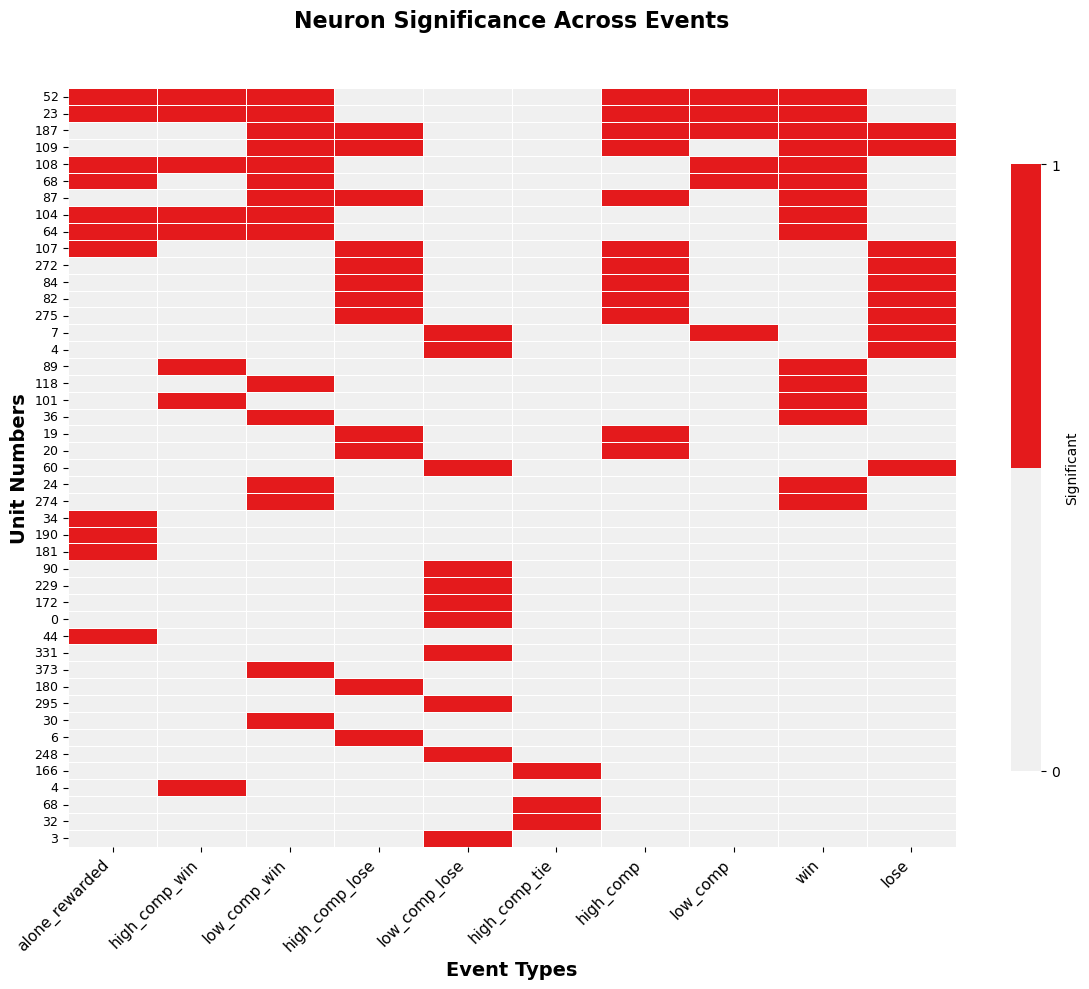

In [139]:
import matplotlib.pyplot as plt
import seaborn as sns

print("=== CREATING NEURON-EVENT SIGNIFICANCE HEATMAP (Improved Grouping & Colors) ===")

heatmap_exclude_events = [ 'alone_rewarded_baseline', 'high_comp_lose_baseline', 'high_comp_win_baseline', 
                           'low_comp_lose_baseline', 'low_comp_win_baseline', 'overall_pretone']

# Copy to avoid warnings
heat_map_exclude_sig = global_sig[~global_sig['Event name'].isin(heatmap_exclude_events)]

# Unique neuron ID
heat_map_exclude_sig['Neuron_ID'] = (
    heat_map_exclude_sig['Recording'].astype(str) +
    '_Unit_' + heat_map_exclude_sig['Unit number'].astype(str)
)

# Pivot for heatmap
heatmap_data = heat_map_exclude_sig.pivot_table(
    index='Neuron_ID',
    columns='Event name',
    values='Reward period Z-Score',
    fill_value=0
)

# Binary significance
significance_data = (heatmap_data != 0).astype(int)

# Order neurons by number of sig events
neuron_event_counts = significance_data.sum(axis=1).sort_values(ascending=False)
significance_data_sorted = significance_data.loc[neuron_event_counts.index]

# === Custom event ordering ===
# Put wins + alone_rewarded together, then losses, then ties
event_order = [
    "alone_rewarded",
    "high_comp_win", "low_comp_win",
    "high_comp_lose", "low_comp_lose",
    "high_comp_tie", "high_comp", "low_comp", "win", "lose"
]
# Reorder columns if they exist in data
event_order = [e for e in event_order if e in significance_data_sorted.columns]
significance_data_sorted = significance_data_sorted[event_order]

# Simpler y-axis labels
unit_labels = [neuron_id.split('_Unit_')[-1] for neuron_id in significance_data_sorted.index]

# === Plotting ===
plt.figure(figsize=(12, 10))

# Discrete colormap: gray (not sig) → bright red (sig)
cmap = sns.color_palette(["#f0f0f0", "#e41a1c"])  # light gray + strong red

sns.heatmap(significance_data_sorted,
            cmap=cmap,
            cbar_kws={'label': 'Significant', 'shrink': 0.8, 'ticks': [0, 1]},
            xticklabels=True,
            yticklabels=unit_labels,
            linewidths=0.5,
            linecolor='white',
            square=False,
            annot=False)


plt.title('Neuron Significance Across Events\n',
          fontsize=16, pad=25, fontweight='bold')
plt.xlabel('Event Types', fontsize=14, fontweight='bold')
plt.ylabel('Unit Numbers', fontsize=14, fontweight='bold')

plt.xticks(rotation=45, ha='right', fontsize=11)
plt.yticks(rotation=0, fontsize=9)

# Clean frame
for side in ['top', 'right', 'bottom', 'left']:
    plt.gca().spines[side].set_visible(False)

plt.tight_layout()
plt.show()


In [140]:
hcw_global = global_sig.query('''`Event name` == 'high_comp_win' ''')
len(hcw_global)

8

In [141]:
lcw = global_sig.query("`Event name` == 'low_comp_win'")
len(lcw)

15

In [142]:
hcl = global_sig.query('''`Event name` == 'high_comp_lose' ''')
len(hcl)

12

In [143]:
lcl = global_sig.query('''`Event name` == 'low_comp_lose' ''')
len(lcl)

11

In [144]:
# find number of significant neurons per event
sig_global_counts = global_sig.groupby(['Event name', 'sig']).size().unstack()
sig_global_counts.head(20)

sig,decrease,increase
Event name,,
alone_rewarded,NaN,11.0
alone_rewarded_baseline,NaN,1.0
high_comp,NaN,12.0
high_comp_lose,NaN,12.0
high_comp_lose_baseline,NaN,1.0
high_comp_tie,NaN,3.0
high_comp_win,NaN,8.0
high_comp_win_baseline,NaN,1.0
lose,NaN,10.0


In [145]:
print(sig_global_counts)

sig                      decrease  increase
Event name                                 
alone_rewarded                NaN      11.0
alone_rewarded_baseline       NaN       1.0
high_comp                     NaN      12.0
high_comp_lose                NaN      12.0
high_comp_lose_baseline       NaN       1.0
high_comp_tie                 NaN       3.0
high_comp_win                 NaN       8.0
high_comp_win_baseline        NaN       1.0
lose                          NaN      10.0
low_comp                      NaN       6.0
low_comp_lose                 NaN      11.0
low_comp_lose_baseline        NaN       1.0
low_comp_win                  1.0      14.0
low_comp_win_baseline         NaN       1.0
overall_pretone               NaN       1.0
win                           1.0      14.0


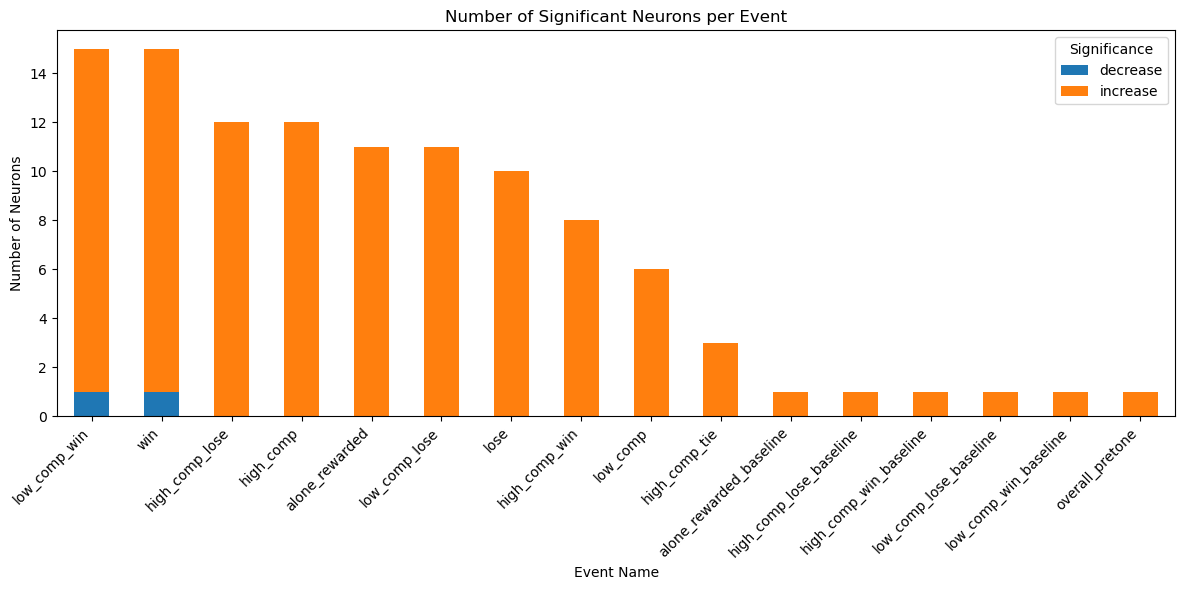

In [146]:
# bar plot from most increasing to least increasing significant neurons per event
import matplotlib.pyplot as plt
sig_global_counts_sorted = sig_global_counts.sort_values(by='increase', ascending=False)
sig_global_counts_sorted.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Number of Significant Neurons per Event')
plt.xlabel('Event Name')
plt.ylabel('Number of Neurons')
plt.legend(title='Significance', loc='upper right')
# make the xlabels horizontal
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



In [147]:
# find the number of each type of event across all recordings
event_counts = {}
for rec in sp.recordings:
    for ev, windows in rec.event_dict.items():
        if ev not in event_counts:
            event_counts[ev] = 0
        event_counts[ev] += len(windows)

for ev, count in event_counts.items():
    print(f"Event: {ev}, Count: {count}")

Event: alone_rewarded, Count: 856
Event: alone_rewarded_baseline, Count: 320
Event: high_comp, Count: 625
Event: high_comp_lose, Count: 295
Event: high_comp_lose_baseline, Count: 330
Event: high_comp_win, Count: 330
Event: high_comp_win_baseline, Count: 320
Event: lose, Count: 435
Event: low_comp, Count: 316
Event: low_comp_lose, Count: 140
Event: low_comp_lose_baseline, Count: 328
Event: low_comp_win, Count: 176
Event: low_comp_win_baseline, Count: 322
Event: overall_pretone, Count: 1300
Event: win, Count: 506
Event: high_comp_tie, Count: 30
